In [1]:
# Health_Insurance_Claim_Prediction.py

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
import shap
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 1. Load Dataset
df = pd.read_csv('enhanced_health_insurance_claims.csv')
print("✅ Dataset Loaded")

✅ Dataset Loaded


In [3]:
# 2. Basic Info
print("\nDataset Info:")
print(df.info())
print("\nNull Values:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4513 entries, 0 to 4512
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ClaimID                  4500 non-null   object 
 1   PatientID                4500 non-null   object 
 2   ProviderID               4500 non-null   object 
 3   ClaimAmount              4500 non-null   float64
 4   ClaimDate                4500 non-null   object 
 5   DiagnosisCode            4500 non-null   object 
 6   ProcedureCode            4500 non-null   object 
 7   PatientAge               4500 non-null   float64
 8   PatientGender            4500 non-null   object 
 9   ProviderSpecialty        4500 non-null   object 
 10  ClaimStatus              4500 non-null   object 
 11  PatientIncome            4500 non-null   float64
 12  PatientMaritalStatus     4500 non-null   object 
 13  PatientEmploymentStatus  4500 non-null   object 
 14  ProviderL

In [4]:
# 3. Drop missing
df = df.dropna()

In [5]:
# 4. Date Processing
df['ClaimDate'] = pd.to_datetime(df['ClaimDate'])
df['claim_month'] = df['ClaimDate'].dt.month

In [6]:
# 5. One-Hot Encoding
df = pd.get_dummies(df, columns=['DiagnosisCode', 'ProcedureCode', 'PatientGender'], drop_first=True)

In [7]:
# 6. Drop Unused Columns
df = df.drop(['ClaimID', 'PatientID', 'ProviderID', 'ClaimDate'], axis=1)
X = df.drop("ClaimApproved", axis=1)   # Replace with actual target column name
y = df["ClaimApproved"]


In [8]:
# 7.Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# 8.Encode object columns
for col in X_train.select_dtypes(include='object').columns:
    X_train[col] = X_train[col].astype('category').cat.codes
    X_test[col] = X_test[col].astype('category').cat.codes

In [10]:
# 9.Train XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
print("\n✅ Model Trained")


✅ Model Trained


In [11]:
# 10. Predict & Evaluate
y_pred = model.predict(X_test)
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy Score: 0.4633333333333333

Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.43      0.46       487
         1.0       0.43      0.51      0.46       413

    accuracy                           0.46       900
   macro avg       0.47      0.47      0.46       900
weighted avg       0.47      0.46      0.46       900




Generating SHAP Summary Plot...


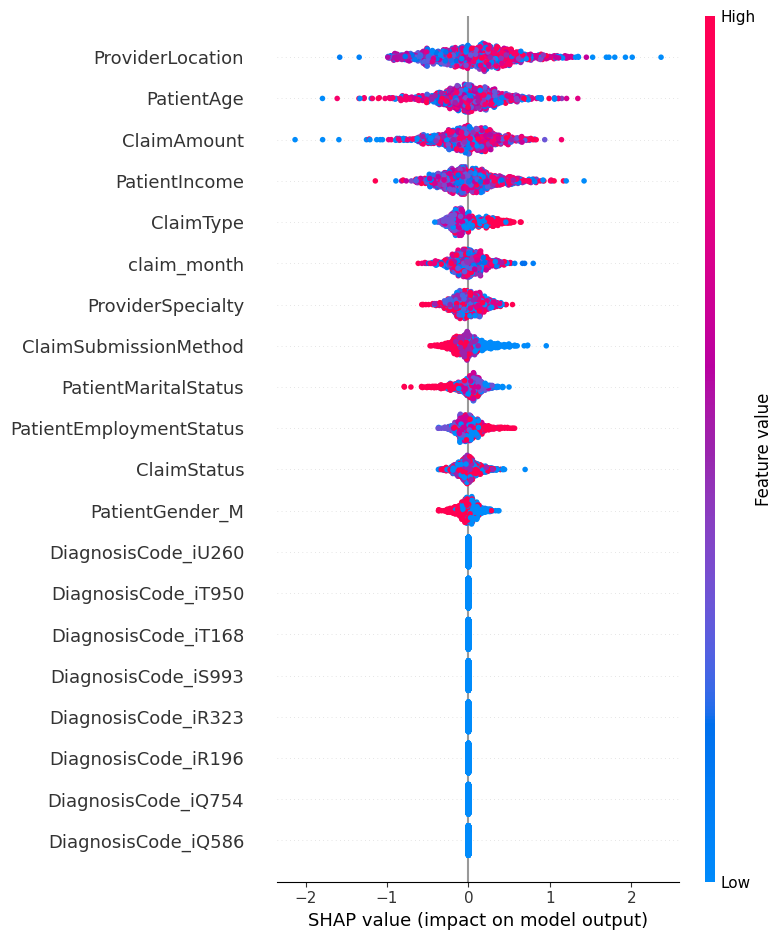

In [12]:
# 11. SHAP Explainability
print("\nGenerating SHAP Summary Plot...")
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)